## A quadratic programming method for correcting and smoothing vehicle trajectories from noisy data

## Abstract

Empirical vehicle trajectory data often suffer from errors and noises in positions and their derivatives due to the limitations of detection and extraction techniques, and there are many challenges associated with mitigating these errors.
In this study, we propose a two-step quadratic programming method to correct and smooth longitudinal vehicle trajectories, making them physically meaningful, with bounded positions and higher-order derivatives based on detection errors, vehicle characteristics, and drivers' behaviors.  
Utilizing symplectic discretization, we express derivatives of positions as linear combinations of positions using difference matrices, leading to linear inequalities that enforce bounds on the speeds and higher-order derivatives. 
Taking the raw positions as the input, we minimize the sum of squared residuals (SSR) between the half-smoothed and raw positions subject to linear inequality constraints in step 1. However, the half-smoothed positions often exhibit large errors in higher-order derivatives, necessitating step 2 to minimize the sum of squared highest-order derivatives and obtain the smoothed positions, the output of the method. 
Apart from the constraints in step 1, step 2 sets the initial number of the highest order positions as the half-smoothed positions and limits the residuals between the smoothed and raw positions within the maximum of the detection errors and the residuals between the half-smoothed and raw positions.
Step 1 guarantees the fidelity of the smoothed trajectories and step 2 ensures the smoothness. 
We conceptually justify the method, theoretically prove that both optimization problems admit unique global optimal solutions, and discuss the computational complexity of our method regarding the highest-order derivatives. 
We compare the NGSIM data smoothed by our method adopting different highest-order derivatives with the manually re-extracted data, and determine the appropriate inclusion of jerks as the highest-order derivatives.
Statistical comparisons show a closer resemblance between our smoothed data and the manually re-extracted data compared to a state-of-the-art method. 
The method is also applied to the highD data, demonstrating robustness in eliminating outliers and high-frequency noises in detected trajectories and making smoothed trajectories consistent with vehicle characteristics and drivers' behaviors. 
Accessible [code](https://github.com/ximeng96/Quadratic-programming-method-for-vehicle-trajectory-correcting-and-smoothing-from-noisy-data/tree/main/codes) and [smoothed data](https://drive.google.com/drive/folders/1C7rw2aps-ZYwIcBbuWnZLT1SY6Ac4JuY?usp=sharing) are provided for replication purposes.
Future work aims to extend the method to handle missing values in detected trajectories.


{\bf Key words}: vehicle trajectory smoothing; quadratic programming; unique global optimal solutions; NGSIM dataset; highD dataset

## Outline

- <a href="#/1/1">1</a>. [Introduction</span>](./Quadratic_programming.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Foundational concepts](./Quadratic_programming.ipynb#Principles)
    - Internally consistent derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Methodology](./Quadratic_programming.ipynb#Methodology)
    - Minimizing the sum squared errors between the half-smoothed and raw positions
    - Calculating position ranges and minimizing the sum squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties](./Quadratic_programming.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computation complexity
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Quadratic_programming.ipynb#Numerical-application)
    - Determination of the highest-order derivatives and the inclusion of the second step
    - Comparison with another method and validation with manual re-extraction 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Quadratic_programming.ipynb.ipynb#Conclusion)

# Introduction
## Data sources and utilities
- Empirical trajectory data
    - Data sources
        - Fixed sensors, mobile sensors
    - Datasets
        - [T-deive](https://www.microsoft.com/en-us/research/publication/t-drive-trajectory-data-sample/), [Waymo](https://waymo.com/open/), [NGSIM](https://datahub.transportation.gov/stories/s/Next-Generation-Simulation-NGSIM-Open-Data/i5zb-xe34), [highD](https://www.highd-dataset.com/), [CitySim](https://github.com/ozheng1993/UCF-SST-CitySim-Dataset)
    - Utility
        - Car-following models calibration and validation [(Punzo and Montanino,2016)](https://www.sciencedirect.com/science/article/pii/S0191261515300655)
        - Route planning [(Yuan et al., 2011)](https://dl.acm.org/doi/10.1145/2020408.2020462)
        - Driving behavior analysis [(Chiabaut et al., 2010)](https://www.sciencedirect.com/science/article/pii/S0191261509000976)
        - Network design [(Zheng et al., 2011)](https://dl.acm.org/doi/10.1145/2030112.2030126)
        - Eco-driving strategy design [(Yang and Jin,2014)](https://www.sciencedirect.com/science/article/pii/S0968090X14000308)
        - Vehicle motion prediction [(Wu et al., 2020)](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8317913)

## Causes and impact of detection errors

<div class="column" style="float: left; width: 60%;">
    
- Data collection stages
    - System setup, vehicle detection, trajectory extraction, trajectory smoothing
- Data problems
    - Errors and noises in detected positions
    - High sampling frequency leads to extreme outliers in high-order derivatives of positions
- Causes of errors
    - System setup
        - Vehicles blocked by road signs
        - Projection angles
    - Detection techniques
        - Vibration of the detectors’ carriers
        - Low-resolution cameras
    - Extraction algorithm
        - Miss identification of vehicles by their shadows
        - Fail to follow vehicles’ movements
    - Smoothing method
        - Insufficient trajectory smoothing (Unable to eliminate all outliers)
        - Fail to reflect vehicle characteristic and drivers’ behaviors 
    
</div>

<div class="column" style="float: left; width: 40%;">
    
- Problems of the errors
    - Reduced sensitivity of the objective function and decreased accuracy of calibration results in model calibrations 
    - Inaccurate trajectory predictions
    - Mistakes in analysis of safety and comfort, which highly relates to accelerations and jerks
    
</div>

## Trajectory correction

- Correction: estimate the most probable values of ground truth data based on the observed data [(Whittaker, 1922)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/744E6CBD93804DA4DF7CAC50507FA7BB/S0013091500077853a.pdf/div-class-title-on-a-new-method-of-graduation-div.pdf)
- Correction of vehicle trajectory data can be achieved in each stage
    - System setup
        - Choose areas without large signs
        - Install the detectors directly above the study area
    - Detection techniques
        - Use high-resolution cameras 
        - Use carriers (drones / helicopters) with small vibration
    - Extraction algorithms
        - Manually re-extract
    - Smoothing methods
        - Develop new smoothing methods
        
Compared to other stages, improving smoothing methods is cost-efficient and time-efficient

## Smoothing methods
### Categories / history

$$ \text{Filters} \left\{
\begin{matrix}
\text{Frequency domain filters} \\
\text{Time domain} \left\{\begin{matrix}
                    \text{Convolution filters (moving average with different kernels) } \\
                    \text{Recursive filters} \\
                    \text{Spline filters}  \left\{\begin{matrix}
                                        \text{Regression spline} \\
                                        \text{Smoothing spline} \\
                                        \text{Penalty spline}
                                        \end{matrix}
                                        \right. \\
                    \end{matrix}
                    \right. \\
\text{Combination of the two}
\end{matrix}
\right.
$$
- Frequency domain filters: Butterworth filter, wavelet-based filters [(Fard et al., 2017)](https://www.sciencedirect.com/science/article/pii/S0968090X16302261), [(Dong et al., 2021)](https://www.sciencedirect.com/science/article/pii/S0378437121005689)
- Convolution filters: moving average with different kernels. [(Thiemann et al., 2008)](https://journals.sagepub.com/doi/pdf/10.3141/2088-10), [(Coifman and Li,2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838)
- Recursive time-domain filters [(Ma and Andr ́easson, 2005)](https://ieeexplore.ieee.org/document/1563610), [(Krajewski et al., 2018)](https://www.highd-dataset.com/)
- Regression spline: piecewise polynomials to fit the observed data. [(Toledo et al., 2007)](https://journals.sagepub.com/doi/pdf/10.3141/1999-17), [(Venthuruthiyil and Chunchu,2018)](https://www.tandfonline.com/doi/full/10.1080/23249935.2018.1449032)
- Smoothing spline: balances fidelity and smoothness, minimize weighted sum of squared third-order derivatives and squared residuals.
- Penalty spline: a combination of B-splines and difference penalties. [(Marczak and Buisson, 2012)](https://journals.sagepub.com/doi/10.3141/2315-04)
- Combination of the two [(Montanino and Punzo, 2013, 2015)](https://www.sciencedirect.com/science/article/pii/S0191261515001393)

### Limitation of existing methods

- **Internal inconsistency**
    - Convolution filters
- Difficulties in **addrssing boundedness** of higher-order derivatives
    - Frequency-domain filters
    - Convolution filters
    - Spline filters with no constraints
- No guarantee of the **existence and uniqueness** of solutions
    - Spline filters with constraints
    - Combination method
- **Unbounded modifications** of positions
    - All the aforementioned methods

## Idea of minimum theory

- Penalty term in [(Whittaker, 1922)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/744E6CBD93804DA4DF7CAC50507FA7BB/S0013091500077853a.pdf/div-class-title-on-a-new-method-of-graduation-div.pdf): minimized sum of squared third-order derivatives (in our case, the jerks) effectively captures real driving behaviors
    - Minimum jerk trajectory of human arm movements [(Flash and Hogan, 1985)](https://www.jneurosci.org/content/5/7/1688.short)
    - Drivers’ stress levels increase when they experience stronger jerks [(Othman et al. 2008)](https://ieeexplore.ieee.org/abstract/document/4811498)
    - Wide application in trajectory design scenarios

- Two types of trajectory design problems in the literature
    - Input: Waypoints ($x_m$)
    - Output: Trajectory (time series of positions) ($(\tilde{x}_m, \tilde{t}_m)$)
    - Make the trajectory to be completed at a specified time while smoothly traversing several waypoints [(Mellinger and Kumar, 2011)](https://ieeexplore.ieee.org/document/5980409) 
        - Objective:  minimize **sum squared snaps (the derivative of jerks)**
            - The original objective function is to minimize a weighted sum of sum squared snaps and squared yaw angles, here we consider the scenario where the yaw angles are excluded from consideration
        - Constraints: 1. **Precise traversal** of waypoints 2. **time to finish the trajectory**
    - Make the trajectory have bounded speeds, accelerations, and jerks and to smoothly traverse several waypoints  [(Gasparetto and Zanotto,2007,](https://www.sciencedirect.com/science/article/pii/S0094114X06000887) [2008,](https://www.sciencedirect.com/science/article/pii/S0736584507000543) [2010)](https://www.sciencedirect.com/science/article/pii/S0965997809002464)
        - Objective: minimize a **weighted sum of squared jerks (or the absolute mean jerk) and the execution time**
        - Constraints: 1. **Precise traversal** of waypoints 2. **Bounded** speeds, accelerations, and jerks
        

- Haven't found the application of minimum-jerk theory in trajectory smoothing

- Relation between trajectory smoothing and trajectory design
    - Similarity
        - Objective: minimize the **sum squared highest-order derivatives** (accelerations / jerks / snaps)
        - Constraints: **bounded higher-order derivatives**
    - Difference
        - Input and output: detected positions ($x_m, t_m$) -> smoothed positions ($\tilde{x}_m, t_m$) VS waypoints ($x_m$) -> designed trajectory ($(\tilde{x}_m, \tilde{t}_m)$)
            - For trajectory design problems, the input and the output has **different dimensions**
            - For trajectory smoothing problems, the output maintains the **same dimension** as the input
        - Constraints: allow **bounded shift** of the detected position at each waypoint VS precisely traverse each given waypoint

## The proposed method

- Five elements in vehicle trajectory smoothing
    - Fidelity, smoothness, bounded derivatives, bounded errors, basis functions
- Categorization of existing methods and applications and our method
    - <table>
    <tr>
        <td colspan="2">Method</td>
        <td>Fidelity </td>
        <td>Smoothness </td>
        <td>Bounded derivatives </td>
        <td>Bounded errors </td>
        <td>Basis functions </td>
    </tr>
    <tr>
        <td colspan="2">Regression spline</td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td> </td>
        <td>$\surd$ </td>
    </tr>
    <tr>
        <td colspan="2">Smoothing spline</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">Penalty spline</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td>$\surd$ </td>
    </tr>
    <tr>
        <td colspan="2">(Toledo et al.,2007)</td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
    </tr>
    <tr>
        <td colspan="2">(Marczak and Buisson, 2012)</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td>$\surd$ </td>
    </tr>
    <tr>
        <td colspan="2">(Venthuruthiyil and Chunchu, 2018)</td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td> </td>
        <td>$\surd$ </td>
    </tr>
    <tr>
        <td rowspan="2">Our method</td>
        <td>Step 1</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td>Step 2</td>
        <td> </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
    </tr>
</table>

## Notation list
Table 1: List of notations

|Variables | Definitions  | Variables | Definitions |
| :----:| :----: | :----: | :----: |
| $t$ | Time | $T$ | Total recording duration of one vehicle |
| $\Delta t$ | Time step size | $m$ | Number of the detected position |
| $t_m$ | Time at which the $m$ th position in the trajectory is detected |
|$M$ | Total number of detected positions in the trajectory| 
| $K$ | The highest-order of the derivatives of positions in constraints|
| $l$ | Length of the study site | $\varepsilon$ | Absolute estimated accuracy |
|$\textbf{x}_{-}$ |  Vector of the lower bounds of positions | $\textbf{x}_{+}$ | Vector of the upper bounds of positions |
|$\hat{x}_m$ | HHalf-smoothed position at $t_m$ | $\tilde{x}_m$ | Smoothed position at $t_m$ |
|${x}_m^*$ | Ground truth position at $t_m$ | $\hat{x}^{(k)}_m$ | The $k$ th-order derivatives of $\hat{x}$ at $t_m$, $k=1,...,K$ |
| $\tilde{x}^{(k)}_m$ | The $k$ th-order derivatives of $\tilde{x}$ at $t_m$, $k=1,...,K$ | ${x}^{(k)*}_m$ | The $k$ th-order derivatives of $x^*$ at $t_m$, $k=1,...,K$ |
| $x^{(k)}_-$ | Lower bound of the $k$ th-order derivatives of the positions, $k=1,...,K$ |
| $x^{(k)}_+$ | The $k$ th-order derivatives of $x^*$ at at the $m$ th time instant, $k=1,...,K$ |
|$W^{(k)}$ | The $k$ th difference matrix, $k=1,...,K$ | $E(\cdot)$ | Mean value |

List of each term in the code

|Parameter | Remark | Parameter | Remark |
| :----:| :----: | :----: | :----: |
| highest_order | The highest-order of the derivatives to be considered | delta_t | Time step |
| up_v | Upper bound of speed | down_v | Lower bound of speed |
| up_a | Upper bound of acceleration | down_a | Lower bound of acceleration |
| up_j | Upper bound of jerk | down_j | Lower bound of jerk |
| up_s | Upper bound of snap | down_s | Lower bound of snap |
| lower_order | The physical quantity to be differentiated | higher_order | The higher-order physical quantity to be calculated |
|order_ind | Indicator of variables at different orders (1: speed, 2: acceleration, 3:jerk) |
|cons_id | Indicator of the highest-order derivatives (1: speed, 2: acceleration, 3:jerk, 4:snaps) |
| est_acc | Estimated accuracy of the detacted position  |  |  |


# Foundational concepts of internally consistent and bounded derivatives of positions

## Internally consistent derivatives of positions

- We can write the higher-order derivatives of positions as follows:
$$
\textbf{x}^{(k+1)} = \frac{\textbf{x}^{(k)}}{dt} = \frac{d^{(k+1)}\textbf{x}}{dt^{(k+1)}},
$$
    - $\textbf{x}^{(k)}$: the $k$ th-order derivatives of positions

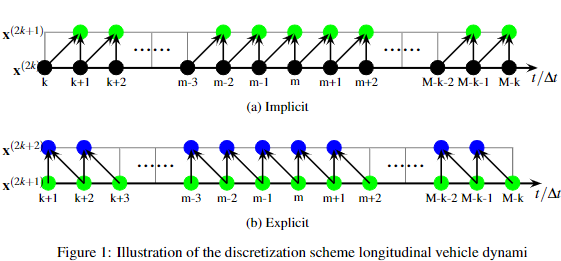

- Sympletic discretization of positions 
    - $2k+1$ is odd
        - Implicit discretization: $$x^{(2k+1)}_m = \frac{x_m^{(2k)}-x_{m-1}^{(2k)}}{\Delta t}, \ \ k \in N $$ 
    - $2k+2$ is even
        - Explicit discretization: $$x^{(2k+2)}_m = \frac{x_{m+1}^{(2k+1)}-x_{m}^{(2k+1)}}{\Delta t},  \ \ k \in N $$ 

- Sympletic discretization of positions (matrix form)
    - $$ \textbf{x}^{(k)} = \frac{W^{(k)} \textbf{x}}{\Delta t^k}$$
    $$ W^{(k)} = ((\textbf{0}| I_{M+1-k}) - (I_{M+1-k}| \textbf{0})) \cdot W^{(k-1)}, k = 1,...,K $$
    
[Discretization scheme (in case the uploaded figure does not work)](https://github.com/ximeng96/Quadratic-programming-method-for-vehicle-trajectory-correcting-and-smoothing-from-noisy-data/blob/main/figures/differentiate.PNG)

In [1]:
def differentiation(lower_order, higher_order, delta_t,  order_ind):
    import copy
    new_array = copy.deepcopy(lower_order);
    update_higher = copy.deepcopy(higher_order);
    if order_ind == 1 or order_ind == 3 or order_ind == 5: #differentiate implicit (for speeds and jerks) 
        update_higher[ 1 : ] = (new_array[ 1 : ]-new_array[ : len(new_array)-1]) / delta_t #(eq 2a)
    elif order_ind == 2 or order_ind == 4 or order_ind == 6: #differentiate explicit (for accelerations and snaps)
        update_higher[ : len(new_array)-1] = (new_array[1 : ]-new_array[ : len(new_array)-1]) / delta_t #(eq 2b)
        
    return update_higher

## Linear inequality constraints based on bounded derivatives of positions

- Bounded derivatives of positions:
$$
x^{(k)}_{-} \leq \textbf{x}^{(k)} \leq x^{(k)}_{+}, \ \  k = 1,...,K
$$
    - $x^{(k)}_{-}$ and $x^{(k)}_{+}$: lower and upper bounds of the $k$ th-order derivatives of positions
- Written as linear inequality constraints :
$$
x^{(k)}_{-} \leq \frac{W^{(k)} \textbf{x}}{\Delta t ^k} \leq x^{(k)}_{+}, \ \  k = 1,...,K
$$

- Physical bounds of higher-order derivatives of position:
    - Jerks are typically bounded within $[-8, 8] m/s^3$ based on experiments conducted with LOLA test vehicles. [(Martinez and Canudas-de Wit, 2007)](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=4105943&tag=1)
    - The acceleration of ACC systems must not exceed $2 m/s^2$  and the average rate of change of automatic deceleration (negative jerk) over one second must not surpass $-2.5 m/s^3$. [(ISO, 2010)](http://www.puntofocal.gov.ar/notific_otros_miembros/sau283_t.pdf)
    - The average accelerations of ordinary vehicles are usually between $3 m/s^2$ to $4 m/s^2$. [(Elert, 2012)](https://hypertextbook.com/facts/2001/MeredithBarricella.shtml) 
    - Maximum acceleration and deceleration values for petrol vehicles were approximately $3 m/s^2$  and $4 m/s^2$. [(Bokare and Maurya, 2017)](https://www.sciencedirect.com/science/article/pii/S2352146517307937) 
    - The 99th percentile acceleration and jerk values were $2.85 m/s^2$ and $2.6 m/s^3$ based on a freeway experiment involving sixteen Honda Accords and 108 drivers. [(Fard et al. 2017)](https://www.sciencedirect.com/science/article/pii/S0001457517301409) 
    - Some studies on adaptive cruise control also use a jerk range of $[−5, 5]  m/s^3$. [( Al-Gabalawy et al. 2021)](https://link.springer.com/article/10.1007/s40435-020-00732-w)

In [2]:
def difference_matrix(v_num): # the input is the number of speeds of one vehicle, the outputs are difference matrices
    diff0_0 = -np.identity(v_num+1); diff0_1 = np.identity(v_num+1); # for positions
    diff1 = np.zeros((2*v_num,v_num+1)); # for speeds
    diff2 = np.zeros((2*v_num-2,v_num+1)); # for accelerations
    diff3 = np.zeros((2*v_num-4,v_num+1)); # for jerks
    diff4 = np.zeros((2*v_num-6,v_num+1)); # for snaps
    '''The following calculations correspond to (eq 5) regarding different k'''
    for i in range(v_num): #coefficient matrix for speeds
        diff1[i,i:i+2] = [1,-1] 
        diff1[i+v_num,i:i+2] = [-1,1]
    for i in range(v_num-1): #coefficient matrix for accelerations
        diff2[i,i:i+3] = [-1,2,-1] 
        diff2[i+(v_num-1),i:i+3] = [1,-2,1] 
    for i in range(v_num-2): #coefficient matrix for jerks
        diff3[i,i:i+4] = [1,-3,3,-1] 
        diff3[i+(v_num-2),i:i+4] = [-1,3,-3,1] 
    for i in range(v_num-3): #coefficient matrix for snaps
        diff4[i,i:i+5] = [-1,4,-6,4,-1] 
        diff4[i+(v_num-3),i:i+5] = [1,-4,6,-4,1] 
    return diff0_0, diff0_1, diff1, diff2, diff3, diff4

# Two-step quadratic programming method

- Two steps:
    1. Minimizing the mean square errors (MSE) between the half-smoothed and raw positions
    2. Determining position ranges and minimizing the mean squared highest-order derivatives
- Each step involve an optimization problem
- Input:
    - Raw positions
    - Feasible ranges of derivatives of positions
    - Estimated accuracy
- Output:
    - Smoothed positions
    - Smoothed higher-order derivatives

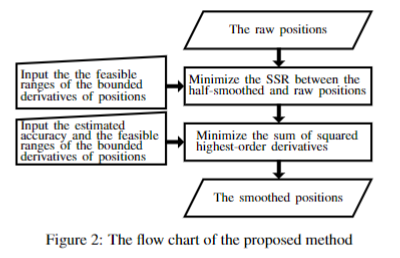

## Minimizing the sum of squared residuals (SSR) between the half-smoothed and raw positions

- Objective: minimizing the MSE between the half-smoothed and raw positions
- Constraints: bounded higher order derivatives of positions 

<div class="column" style="float: left; width: 50%;">
    
- The optimization problem: 
$$
\min (\hat{\textbf{x}}-\textbf{x})^T(\hat{\textbf{x}}-\textbf{x}), 
$$
$$
\text{s.t.}\ \  0 \leq \hat{\textbf{x}} \leq l, 
$$
$$
 x^{(k)}_- \leq \hat{\textbf{x}}^{(k)} \leq x^{(k)}_+, \ \ k = 1,...,K, 
$$
    
    - $\hat{\textbf{x}}^{(k)}$: vector of half-smoothed positions
    
<font color = blue size = 4>Write them with matrices -> </font>
</div>

<div class="column" style="float: left; width: 50%;">
    
- Rewritten optimization problem:
$$
 \min (\hat{\textbf{x}}-\textbf{x})^T(\hat{\textbf{x}}-\textbf{x}), 
$$
$$
\text{s.t.}\ \   -\hat{\textbf{x}} \leq 0, 
$$
$$
\hat{\textbf{x}} \leq l,
$$
$$
\frac{-W^{(k)}\hat{\textbf{x}}}{ \Delta t^k} \leq - x^{(k)}_{-}, \ \ k = 1,...,K, 
$$
$$
\frac{W^{(k)}\hat{\textbf{x}}}{\Delta t^k } \leq  x^{(k)}_{+}  \ \ k = 1,...,K. 
$$   
    
    - $W^{(k)}$: $k$ th difference matrix
</div>

- By solving this optimization problem, the resulting positions ensure that all higher-order derivatives are within physically feasible rangesting half-smoothed positions ensure that all higher-order derivatives are within physically feasible ranges.

In [3]:
#The code for calculate half-smoothed positions
def reconstruct_traj_l2(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id): # the input is the raw position, speed bounds, acceleration bounds, jerk bounds, snap bounds
    M = len(raw_x) - 1
    x = cp.Variable(M+1) #Define variables
    # coefficient matrix
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M)
    '''the coefficient matrix and the right side of the constraints, (eq 9a)-(eq 9e)'''
    f = int(round(1/delta_t,0)); 
    if cons_id == 1: #highest order is accelerations
        coe_l = np.vstack( (W0_0,W0_1,W1*f) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1),np.array([up_v]*M).reshape(M,1) ) ).reshape(4*M+2,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 2: #highest order is accelerations
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1) ) ).reshape(6*M,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 3: #highest order is jerks
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1),
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1), np.array([-down_j]*(M-2)).reshape(M-2,1), np.array([up_j]*(M-2)).reshape(M-2,1)) ).reshape(8*M-4,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 4: #highest order is snaps
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3),W4*(f**4)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1), np.array([-down_j]*(M-2)).reshape(M-2,1), np.array([up_j]*(M-2)).reshape(M-2,1),
                            np.array([-down_s]*(M-3)).reshape(M-3,1), np.array([up_s]*(M-3)).reshape(M-3,1) ) ).reshape(10*M-10,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    obj = cp.sum_squares(x - raw_x) #objective function
    model = cp.Problem(cp.Minimize(obj), cons)
    #solve the model
    model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2)
    new_x = x.value; pos_array = np.array(raw_x).reshape(len(raw_x),1) #reconstructed positions and raw_positions
    
    return new_x, pos_array, model 

## Calculating position ranges and minimizing the sum of squared highest-order derivatives

<font size = 5>Calculating position ranges </font>

- The lower bound of the position at the $m$ th time instant: 
    - $\hat{x}_m$: if $x_m-\hat{x}_m$ is greater than the absolute estimated accuracy $\varepsilon$
        -  $x_m$: raw positions, $\hat{x}_m$: half-smoothed positionsm
    - $x_m - \varepsilon$: otherwise
- The upper bound of the position at the $m$ th time instant: 
    - $\hat{x}_m$: if $\hat{x}_m-x_m$ is greater than the absolute estimated accuracy $\varepsilon$
    - $x_m + \varepsilon$: otherwise
- The position can be calculated as follows:
$$
\min\{x_m - \varepsilon, \hat{x}_m\} \leq \tilde{x}_m \leq  \max\{ x_m + \varepsilon, \hat{x}_m\}, (10)
$$

In [4]:
def position_limit(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, cons_id): 
    #the input are the raw positions, and the outputs are lower bound and the upper bound of the position
    import copy
    new_x, raw_pos, pos_model = reconstruct_traj_l2(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id); #calculate the reconstructed positions based on l_2 norm minimization
    raw_up = raw_x + est_acc; raw_down = raw_x - est_acc #upper and lower limit of the raw position, if it is a feasible region, then this is the position constraint
    upper_x = np.maximum(raw_x + est_acc, new_x); lower_x = np.minimum(raw_x - est_acc, new_x) #(eq 10) 
    return upper_x, lower_x, new_x

<font size = 5>Minimizing the sum of squared highest-order derivatives </font>

- Integration: an inversed procedure of differentiation  
    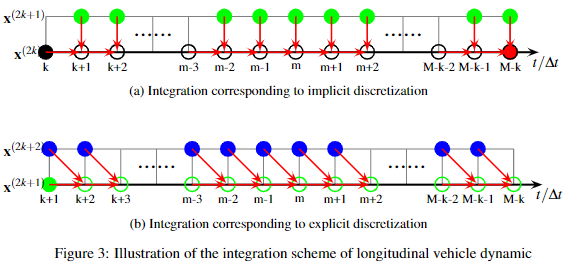
    - Given the initial values and the time series of their higher-order derivatives, it is possible to calculate the time series of lower-order derivatives
    - Computation cost increases as $m$ increase, unlike differentiation each value in $\textbf{x}^{(2k+1)}$ can be calculated with two values in $\textbf{x}^{(2k)}$ 
    - Reformulate the optimization problem with positions as independent variables
    - Knowing the initial value of the $K$ th-order derivatives of positions is equivalent to knowing the first $K$ positions

[Integration scheme (in case the uploaded figure does not work)](https://github.com/ximeng96/Quadratic-programming-method-for-vehicle-trajectory-correcting-and-smoothing-from-noisy-data/tree/main/figures)

<font size = 5>Minimizing the sum squared highest-order derivatives (Cont.) </font>

- Objective: minimizing the sum squared highest-order derivatives
- Constraints: bounded positions and higher order derivatives of positions, initial $K$ positions are equal to half-smoothed positions

<div class="column" style="float: left; width: 50%;">
    
- The optimization problem: 
$$
\min  (\tilde{\textbf{x}}^{(K)})^T \tilde{\textbf{x}}^{(K)},
$$
$$
\text{s.t.} \ \ {\textbf{x}}_- \leq \tilde{\textbf{x}} \leq {\textbf{x}}_+, 
$$
$$
x^{(k)}_- \leq \tilde{\textbf{x}}^{(k)} \leq x^{(k)}_+, \ \ k = 1,...,K, 
$$
$$
\tilde{x}^{(k)}_{k/2} = \hat{x}^{(k)}_{k/2}, \ \ k\ \text{is an even and} \ k\in \{0,1,...,K-1\}, 
$$
$$
\tilde{x}^{(k)}_{(k+1)/2} = \hat{x}^{(k)}_{(k+1)/2}, \ \ k\ \text{is an odd and} \ k\in \{0,1,...,K-1\}, 
$$
    - $\tilde{\textbf{x}}$: the smoothed positions
    - $\tilde{\textbf{x}}^{(k)}$: the smoothed $k$ th-order derivatives of $\tilde{\textbf{x}}$.
    
<font color = blue size = 4>Write them with matrices, and positions as independent variables -> </font>
</div>

<div class="column" style="float: left; width: 50%;">
    
- Rewritten optimization problem:
$$
 \min{\frac{1}{\Delta t^{(2K)}} (W^{(K)} \tilde{\textbf{x}})^T (W^{(K)}\tilde{\textbf{x}})}, 
$$
$$
\text{s.t.} \ \  - \tilde{\textbf{x}} \leq - {\textbf{x}}_-,
$$
$$
\tilde{\textbf{x}} \leq {\textbf{x}}_+, 
$$
$$
 \frac{-W^{(k)}\tilde{\textbf{x}}}{\Delta t^k} \leq -x^{(k)}_-,  \  \ k = 1,...,K, 
$$
$$
\frac{W^{(k)}\tilde{\textbf{x}}}{\Delta t^k} \leq x^{(k)}_+,  \  \ k = 1,...,K, 
$$
$$
\tilde{\textbf{x}}_{1:K} = \hat{\textbf{x}}_{1:K},
$$
    - $W^{(k)}$: the $k$ th difference matrix whose dimension is $(M+1-k)\times (M+1)$ 
    - $\hat{\textbf{x}}_{1:K} = (\hat{x}_0, \hat{x}_1, ..., \hat{x}_{K-1})^T $.
</div>
- We let $K = 1,2,3,4$ and consider up to $4$ th-order derivatives of positions

In [5]:
# The code for step 2
def reconstruct_traj_minhighest(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id): # the input is the raw position, speed bounds, acceleration bounds, jerk bounds, snap bounds
    M = len(raw_x) - 1
    x = cp.Variable(M+1, pos = True) #Define variables
    pos_up, pos_down, l2_pos = position_limit(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, cons_id) #lower bound and upper bound of positions
    '''the coefficient matrix and the right side of the constraints, (eq 13a)-(eq 13f)'''
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M)
    f = int(round(1/delta_t,0)); 
    if cons_id == 1: #highest order is speed
        coe_l = np.vstack( (W0_0,W0_1,W1*f) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1) ) ).reshape(4*M+2,) #right side of constraints
        obj = cp.sum_squares(((W1[M:]*f) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0]] #constraints, AX <= b , initial value equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 2: #highest order is acceleration
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2)) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1),
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1) ) ).reshape(6*M,) #right side of constraints
        obj = cp.sum_squares(((W2[M-1:]*(f**2)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1]] #constraints, AX <= b , initial two values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 3: #highest order is jerk
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3)) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1), np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1) ) ).reshape(8*M-4,) #right side of constraints
        obj = cp.sum_squares(((W3[M-2:]*(f**3)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1], x[2] == l2_pos[2]] #constraints, AX <= b, initial three values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 4: #highest order is snap
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3),W4*(f**4)) );
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1),  np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1), 
                           np.array([-down_s]*(M-3)).reshape(M-3,1), np.array([up_s]*(M-3)).reshape(M-3,1) ) ).reshape(10*M-10,) #right side of constraints
        obj = cp.sum_squares(((W4[M-3:]*(f**4)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1], x[2] == l2_pos[2], x[3] == l2_pos[3]] #constraints, AX <= b , initial four values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2)
    #print("status",model.status,"The optimal value is", round(model.value,5))
    new_x = x.value; pos_array = np.array(raw_x).reshape(len(raw_x),1); l2_pos = l2_pos.reshape(len(l2_pos),1) #reconstructed positions and raw_positions
        
    return new_x, l2_pos, pos_array, model 

The possible values of $K$ are 1, 2, 3, or 4, and the coefficient matrices differ based on the chosen value of $K$. Nevertheless, the structures of these matrices remain identical, regardless of $K$. For instance, if we take $K=2$, we only need to consider $W^{(1)}$ and $W^{(2)}$.
Once the problem is reformulated, we can solve it to obtain the position vector that yields the smallest sum squared highest-order derivatives.
Up to now, we have obtained the smoothed positions, with which all higher-order derivatives can be calculated.

It can be observed that the outputs of step 2 (smoothed positions) are equal to those of step 1 (half-smoothed position) when the estimated accuracy is zero ($\epsilon = 0\ m$). 
In contrast, a very large estimated accuracy will result in the highest-order derivatives being identically zero except for the initial values. 
The position range constraints, play a crucial role in the calculation of the smoothed positions.

In [6]:
# Code for calculating the higher-order derivatives of smoothed positions
def higher_order_calc_pos(old_matrix, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id):
    new_array_np = old_matrix.values
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them
    cal_array = np.zeros((1,21)); cal_array_l2 = np.zeros((1,21))
    for n_id in range(len(id_set)):
        new_matrix = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )]; new_matrix_l2 = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )]
        raw_pos = new_matrix[:,-14] 
        l2_x, l2_pos_array, l2_model = reconstruct_traj_l2(raw_pos, id_set[n_id], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id) 
        new_pos, l2_position, original_pos, model_pos = reconstruct_traj_minhighest(raw_pos, id_set[n_id], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id)
        l2_x = l2_x.reshape(len(raw_pos),1); new_pos = new_pos.reshape(len(raw_pos),1)
        #half-smoothed positions and higher order derivatives
        new_matrix_l2[:,-7] = l2_x[:,0];
        new_matrix_l2[1:,-6] =   differentiation(new_matrix_l2[:,-7], new_matrix_l2[:,-13], delta_t,  order_ind = 1)[1:] #speed implicit
        new_matrix_l2[1:-1,-5] = differentiation(new_matrix_l2[:,-6], new_matrix_l2[:,-12], delta_t,  order_ind = 2)[1:-1]  #acceleration explicit
        new_matrix_l2[2:-1,-4] = differentiation(new_matrix_l2[:,-5], new_matrix_l2[:,-11], delta_t,  order_ind = 3)[2:-1]  #jerk implicit
        new_matrix_l2[2:-2,-3] = differentiation(new_matrix_l2[:,-4], new_matrix_l2[:,-10], delta_t,  order_ind = 4)[2:-2]  #snap explicit
        new_matrix_l2 = new_matrix_l2[50:-2]
        cal_array_l2 = np.vstack((cal_array_l2, new_matrix_l2))
        #smoothed positions and higher order derivatives
        new_matrix[:,-7] = new_pos[:,0]; 
        new_matrix[1:,-6] =  differentiation(new_matrix[:,-7], new_matrix[:,-13], delta_t,  order_ind = 1)[1:]   #speed implicit
        new_matrix[1:-1,-5] = differentiation(new_matrix[:,-6], new_matrix[:,-12], delta_t,  order_ind = 2)[1:-1]  #acceleration explicit
        new_matrix[2:-1,-4] = differentiation(new_matrix[:,-5], new_matrix[:,-11], delta_t,  order_ind = 3)[2:-1]  #jerk implicit
        new_matrix[2:-2,-3] = differentiation(new_matrix[:,-4], new_matrix[:,-10], delta_t,  order_ind = 4)[2:-2]  #snap explicit
        new_matrix = new_matrix[50:-2]
        cal_array = np.vstack((cal_array, new_matrix)) #[2:-2]
        pos_error = np.mean(np.abs(new_matrix[:, -14] - new_matrix[:, -7])); #calculate the MAE between raw and reconstructed trajectory of one vehicle 
        obj_v = round(np.sum(new_matrix[:, -6]**2),3); obj_a = round(np.sum(new_matrix[:, -5]**2),3); obj_j = round(np.sum(new_matrix[:, -4]**2),3); obj_s = round(np.sum(new_matrix[:, -3]**2),3); 
        #print("id", id_set[n_id] ,"pos_error", pos_error, "obj_v", obj_v, "obj_a", obj_a, "obj_j", obj_j, "obj_s", obj_s) 
    cal_array = cal_array[1: ]; cal_array_l2 = cal_array_l2[1: ]
    pos_error = np.mean(np.abs(cal_array[:,-14]-cal_array[:,-7])); print("pos_error", pos_error, "$m$") #calculate the MAE between raw and reconstructed trajectory of the dataset
    return cal_array, cal_array_l2

# Theoretical properties and computational complexity of the method

Detail discussions are given in the paper, and we omit them here.

# Calibration, validation, and application of the proposed method

The bounds of speeds are set according to the speed limits of the corresponding study sites. 
Taking reference of previous studies, we choose $[-4,5]\ m/s^2$ as the feasible acceleration range and $[-8,8]\ m/s^3$ as the feasible jerk range. To the best of our knowledge, there have been no experimental investigations on vehicle snap bounds. Thus we make the ratio of the maximum absolute snap to the maximum absolute jerk approximately equal to the ratio of the maximum absolute jerk to the maximum absolute acceleration in this study, and choose $[-12,12]\ m/s^4$ as the feasible snap range. 

## Determination of the highest-order derivatives and the inclusion of the second step

[(Coifman and Li,2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838) manually re-extracted the positions recorded by camera 6 on the I80 freeway from 4:00 pm to 4:15 pm on April 13, 2005. The released video \citep{Coifman_video} shows that many errors in raw data are addressed, and their re-extracted data have been used as the ground truth data [(Dong et al., 2021)](https://www.sciencedirect.com/science/article/pii/S0378437121005689). As [(Coifman and Li,2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838) suggested, we calculate the positions, accelerations and jerks with the new speeds and construct the ground truth dataset.

Prior to applying our method, we determine the bound of position errors. According to the features of the NGSIM I80 dataset, the bound of the absolute estimated accuracy is $1.2\ m$, while the number of errors in vehicular tracking is notably higher at the beginning (captured by Camera 1) and the end (captured by Camera 7) of the section, in comparison to the road segments captured by the other cameras [(Montanino and Punzo, 2013, 2015)](https://www.sciencedirect.com/science/article/pii/S0191261515001393), and [(Coifman and Li,2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838) showed that the detection errors in trajectories captured by Camera 6 mainly fall within a range of 2 feet (0.6 meters). Thus we choose $\epsilon = 0.6\ m$.

In [7]:
# Load the data
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cvxpy as cp
from cvxpy import *
import gurobipy as gp 
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.set_option('display.float_format',lambda x : '%.3f' % x)
np.set_printoptions(precision=3, suppress=True)#3 digit, no scientific notation
np.set_printoptions(threshold=np.inf) #no ellipses

veh_traj = pd.read_csv('raw_camera65.csv', usecols = ['Vehicle_ID','Frame_ID','Global_Time','Local_Y','v_Length', 'Preceding','Following'])

#change time to second
veh_traj['Global_Time'] = veh_traj['Global_Time'] * 0.001
for item in ['Local_Y','v_Length']: #Change the unit from ft/s to m/s
    veh_traj[item] = veh_traj[item]*0.3048
#add 14 columns at the end, called "distance", "velocity", "acceleration", "jerk", "snap", "spacing", and "relative speed"
veh_traj['distance'] = 0
veh_traj['velocity'] = 0
veh_traj['acceleration'] = 0 
veh_traj['jerk'] = 0 
veh_traj['snap'] = 0
veh_traj['delta_x'] = 0
veh_traj['delta_v'] = 0
veh_traj['smooth_x'] = 0
veh_traj['smooth_v'] = 0
veh_traj['smooth_a'] = 0
veh_traj['smooth_j'] = 0
veh_traj['smooth_s'] = 0
veh_traj['smooth_delta_x'] = 0
veh_traj['smooth_delta_v'] = 0

(CVXPY) Jun 16 02:36:53 PM: Encountered unexpected exception importing solver NAG:
NagLicenceError({'errcodes': (-399,)}, '\n** The NAG Library for Python on this platform uses\n** underlying Library NLW6I287EL.\n** This Library has been installed as part of the package\n** and it requires a valid licence key.\n** No such key could be validated:\n** the key may not have been installed correctly or\n** it may have expired.\n** The Kusari licence-check utility reports the following:\n** Computer: WIN-0M9LGBI18AO, OEM=9, 16p, 8664\nUser: Administrator\nDirectory: C:\\Users\\Administrator\\2nd_backup\\NGSIM\nNAG_KUSARI_FILE: Not set\nFile .\\nag.key does not exist\nFile .\\nag.licence does not exist\nFile C:\\Users\\Administrator\\nag.key does not exist\nFile C:\\Users\\Administrator\\nag.licence does not exist\nRegistry(CU) Product NLW6I28XE Licence TRIAL 2023/03/11 \n-------------------------------------------------------------------------------\nError: Licence not found; this product re

### Performance of the method with different highest-order derivatives and without the second step

Considering that our initial number of the highest-order ($K$) smoothed positions are set as half-smoothed positions, in order to remove this effect, we pick out all vehicle trajectories from 5 seconds before entering camera 6's area until leaving camera 6's area from the raw NGSIM I80 dataset, and compared the smoothed trajectories in Camera 6 with the ground truth dataset.
We adopt $K$ values from 1 to 4 and apply our method, and solve the quadratic programming problems with GUROBI \citep{gurobi} via CVXPY \citep{diamond2016cvxpy}. 
We determine the appropriate $K$ by comparing the mean square errors (MSEs) between the smoothed data and the data in \citep{coifman2017critical}, as well as the computational cost.

In [8]:
# This module is used as an application function of our method
def method_application(raw_traj, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id):
    original_array = raw_traj.values
    import copy
    new_array_np = copy.deepcopy(original_array); cal_array = np.zeros((1,21));
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them [new_array_np[410000,0]] #
    for n_id in range(len(id_set)): #go over each vehicle
        new_array = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )] 
        new_array[:,-14] = np.absolute(new_array[:,3] - new_array[0,3]) + 4 #moving distance 
        new_array[:,2] = (new_array[:,1] - new_array[0,1]) * delta_t #time 
        new_array[1:,-13] = differentiation(new_array[:,-14], new_array[:,-13], delta_t,  order_ind = 1)[1:] #speed implicit, Eq 1a
        new_array[1:-1,-12] = differentiation(new_array[:,-13], new_array[:,-12], delta_t,  order_ind = 2)[1:-1] #acceleration explicit, Eq 1b
        new_array[2:-1,-11] = differentiation(new_array[:,-12], new_array[:,-11], delta_t,  order_ind = 3)[2:-1] #jerk implicit, Eq 1c
        new_array[2:-2,-10] = differentiation(new_array[:,-11], new_array[:,-10], delta_t,  order_ind = 4)[2:-2] #snap explicit, Eq 1d

        cal_array = np.vstack((cal_array, new_array));
    veh_update = pd.DataFrame(copy.deepcopy(cal_array[1:]));
    smooth_veh2, smooth_veh1 = higher_order_calc_pos(veh_update[:], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id)

    return smooth_veh2, smooth_veh1

In [9]:
# Performance of our method with different K
def calc_time(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order):
    import time; time_list = []
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min snap+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_s = time.time()
    smooth_veh_snap, smooth_veh_l2s = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order)
    T2_s = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_j = time.time()
    smooth_veh_jerk, smooth_veh_l2j = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-1)
    T2_j = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min acceleration+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_a = time.time()
    smooth_veh_acc, smooth_veh_l2a = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-2) 
    T2_a = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min speed+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_v = time.time()
    smooth_veh_vel, smooth_veh_l2v = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-3) 
    T2_v = time.time(); 
    
    time_list.append(round((T2_v - T1_v),3)); time_list.append(round((T2_a - T1_a),3)); time_list.append(round((T2_j - T1_j),3)); time_list.append(round((T2_s - T1_s),3)); 
    print("time_list", time_list)

    return smooth_veh_vel,smooth_veh_acc,smooth_veh_jerk,smooth_veh_snap, time_list, smooth_veh_l2v, smooth_veh_l2a, smooth_veh_l2j, smooth_veh_l2s
down_vel = 0; up_vel = 30; down_acc = -5; up_acc = 4; down_jerk = -8; up_jerk = 8; down_snap = -12; up_snap = 12; 
delta_t = 0.1; est_acc = 0.6; unique = 1; non_unique = 0; highest_order = 4
id_car = 1486
id_num = [id_car, 1478] #+ sorted(set(veh_traj.values[np.where(veh_traj.values[:,0] == id_tar)][:,5].tolist()),key = veh_traj.values[np.where(veh_traj.values[:,0] == id_tar)][:,5].tolist().index)
smooth_veh_v,smooth_veh_a,smooth_veh_j,smooth_veh_s, run_time, smooth_l2v, smooth_l2a, smooth_l2j, smooth_l2s = calc_time(veh_traj, down_vel, 
up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order) #[veh_traj['Vehicle_ID'].isin(id_num)]
pd.DataFrame(smooth_veh_s, columns = ['Vehicle_ID','Frame_ID','Global_Time','Local_Y','v_Length', 'Preceding','Following', 'x', 'v', 'a', 'j', 's', 'delta_x', 'delta_v', 'smooth_x', 'smooth_v', 'smooth_a', 'smooth_j', 'smooth_s', 'smooth_deltax', 'smooth_deltav'])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min snap+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-02
pos_error 0.3463631374530798 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.33667034575907123 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min acceleration+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.3402511966387067 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min speed+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.4042924987328699 $m$
time_list [183.419, 218.045, 268.247, 343.497]


,Vehicle_ID,Frame_ID,Global_Time,Local_Y,v_Length,Preceding,Following,x,v,a,...,s,delta_x,delta_v,smooth_x,smooth_v,smooth_a,smooth_j,smooth_s,smooth_deltax,smooth_deltav
0,1.000,746.000,5.000,384.686,4.359,0.000,11.000,38.695,7.071,-0.396,...,76.200,0.000,0.000,38.265,6.507,0.825,-0.161,-0.593,0.000,0.000
1,1.000,747.000,5.100,385.389,4.359,0.000,11.000,39.399,7.032,0.091,...,-21.336,0.000,0.000,38.924,6.589,0.803,-0.220,-0.532,0.000,0.000
2,1.000,748.000,5.200,386.093,4.359,0.000,11.000,40.103,7.041,0.366,...,-51.816,0.000,0.000,39.591,6.670,0.776,-0.273,-0.470,0.000,0.000
3,1.000,749.000,5.300,386.801,4.359,0.000,11.000,40.810,7.077,0.122,...,-0.000,0.000,0.000,40.265,6.747,0.744,-0.320,-0.408,0.000,0.000
4,1.000,750.000,5.400,387.510,4.359,0.000,11.000,41.519,7.090,-0.122,...,6.096,0.000,0.000,40.947,6.821,0.707,-0.361,-0.347,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143612,1283.000,4131.000,12.800,445.204,4.206,0.000,1293.000,121.396,11.235,-9.327,...,-140.208,0.000,0.000,121.127,10.662,1.856,0.627,0.004,0.000,0.000
143613,1283.000,4132.000,12.900,446.235,4.206,0.000,1293.000,122.426,10.302,-10.058,...,2560.320,0.000,0.000,122.212,10.847,1.918,0.628,0.002,0.000,0.000
143614,1283.000,4133.000,13.000,447.164,4.206,0.000,1293.000,123.355,9.296,14.813,...,-2557.272,0.000,0.000,123.316,11.039,1.981,0.628,0.001,0.000,0.000
143615,1283.000,4134.000,13.100,448.242,4.206,0.000,1293.000,124.433,10.778,14.112,...,252.984,0.000,0.000,124.440,11.237,2.044,0.628,0.000,0.000,0.000


In [10]:
''' Determination of the proper K, The result of this module corresponds to Table 3 in the paper'''
veh_reextract_pd = pd.read_csv('manually_reextract.csv')
veh_multistep_pd = pd.read_csv('multistep.csv')
sample_reextract = veh_reextract_pd[veh_reextract_pd['Vehicle_ID'].isin(id_num)].values

def statistic(l1_x, x1, x2): #l2_x is the output of step 1, x1 is denoise, x2 is ground truth
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import copy
    true_data = copy.deepcopy(x2)
    true_data[:,5] = true_data[:,5] + true_data[:,9]
    derivatives = ["position    ", "speed       ","acceleration","jerk        "]
    ground_truth_id = [5, -7, -6, -1] #  column number of position, speed, acceleration, jerk in the ground truth data
    for i in range(4):
        print("+++++++++Step 1+++++++++")
        l2_smooth = l1_x[:,3] + l1_x[:,-7] - l1_x[:,-14] if i == 0 else l1_x[:,-7+i]
        mse_test = mean_squared_error(l2_smooth,true_data[:,ground_truth_id[i] ]) #mean squared error between the smoothed and raw data
        print("derivative: ", derivatives[i], "    mse: ", round(mse_test,2) ); #"rmse :",round(rmse_test,3), 
        print("+++++++++Step 2+++++++++")
        smoothed = x1[:,3] + x1[:,-7] - x1[:,-14] if i == 0 else x1[:,-7+i]
        mse_test = mean_squared_error(smoothed,true_data[:,ground_truth_id[i] ]) #mean squared error between the smoothed and raw data
        print("derivative: ", derivatives[i], "    mse: ", round(mse_test,2) ); #"rmse :",round(rmse_test,3), 
    
print("----------------------------------------K = 1------------------------------------------------")
statistic(smooth_l2v, smooth_veh_v, veh_reextract_pd.values) 
print("----------------------------------------K = 2------------------------------------------------")
statistic(smooth_l2a, smooth_veh_a, veh_reextract_pd.values) 
print("----------------------------------------K = 3------------------------------------------------")
statistic(smooth_l2j, smooth_veh_j, veh_reextract_pd.values) 
print("----------------------------------------K = 4------------------------------------------------")
statistic(smooth_l2s, smooth_veh_s, veh_reextract_pd.values) 

----------------------------------------K = 1------------------------------------------------
+++++++++Step 1+++++++++
derivative:  position         mse:  1.91
+++++++++Step 2+++++++++
derivative:  position         mse:  2.12
+++++++++Step 1+++++++++
derivative:  speed            mse:  0.87
+++++++++Step 2+++++++++
derivative:  speed            mse:  0.4
+++++++++Step 1+++++++++
derivative:  acceleration     mse:  44.09
+++++++++Step 2+++++++++
derivative:  acceleration     mse:  4.59
+++++++++Step 1+++++++++
derivative:  jerk             mse:  9826.03
+++++++++Step 2+++++++++
derivative:  jerk             mse:  693.29
----------------------------------------K = 2------------------------------------------------
+++++++++Step 1+++++++++
derivative:  position         mse:  1.91
+++++++++Step 2+++++++++
derivative:  position         mse:  1.8
+++++++++Step 1+++++++++
derivative:  speed            mse:  0.6
+++++++++Step 2+++++++++
derivative:  speed            mse:  0.29
+++++++++Step 1++

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


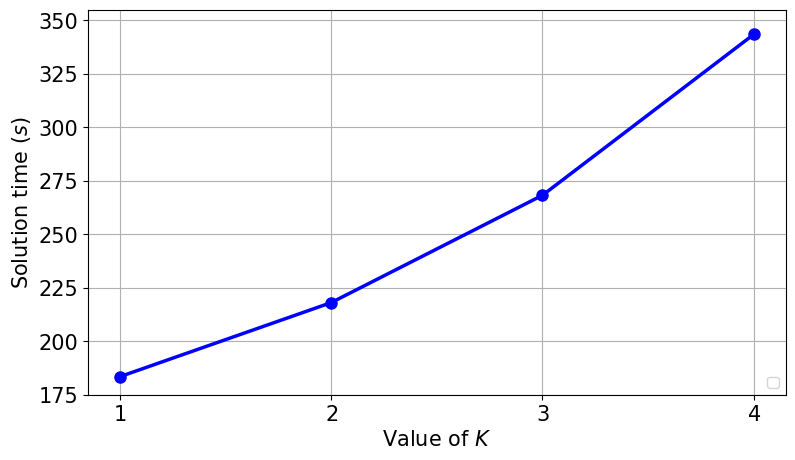

In [11]:
# computation time
import matplotlib.pyplot as plt
font1 = 10; lo = 4; line = 1.5; line2 = 2.5; s1 = 15
font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 15,}
plt.figure(figsize=(9,5));
plt.figure(1)
method = ['$1$', '$2$', '$3$', '$4$']
plt.ylabel("Solution time ($s$)",font2); plt.xlabel("Value of $K$",font2)
plt.xticks(fontsize=15); plt.yticks(fontsize=15);
plt.ylim(175,355); plt.yticks(np.arange(175,360,25),fontsize= s1)
plt.plot(method, np.array(run_time), color = "b", linewidth=line2,  marker='o', markersize = 8); 
plt.grid(); plt.legend(fontsize=font1, loc = lo); #plt.show()

### An example with the two-step method and select parameters

We selected Vehicle 1486 from the NGSIM I80 Camera 6 dataset, which was previously utilized as an example in \citep{coifman2017critical}, to implement our method with $K=3$. 
As depicted in \reff{reconstructed_traj_sample}, the positions, speeds, accelerations, and jerks of the raw data, our smoothed data, and the manually re-extracted data are plotted.

#### Trajectories

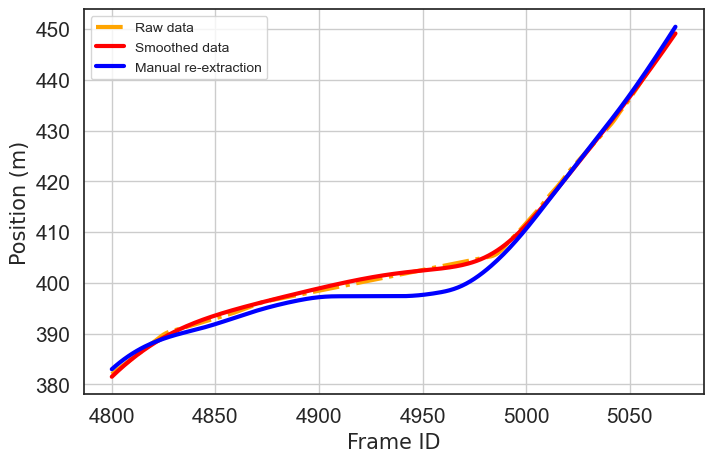

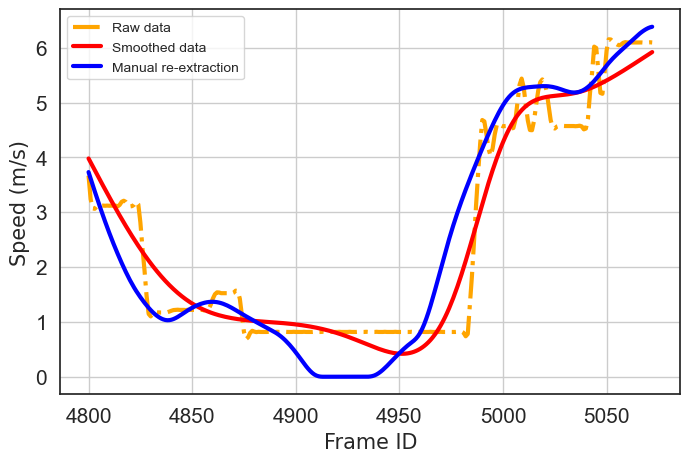

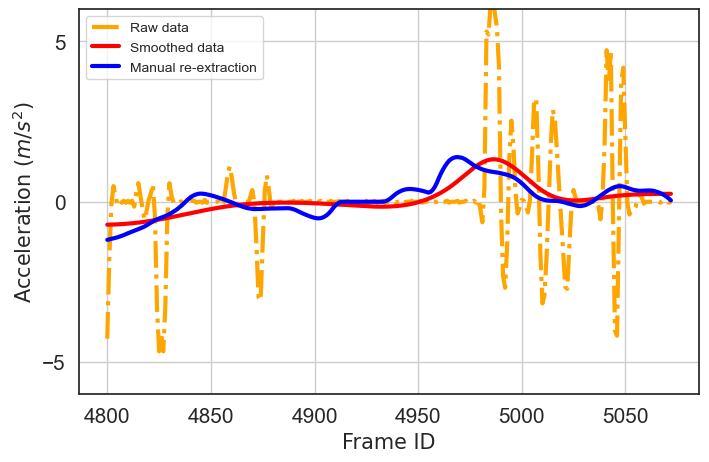

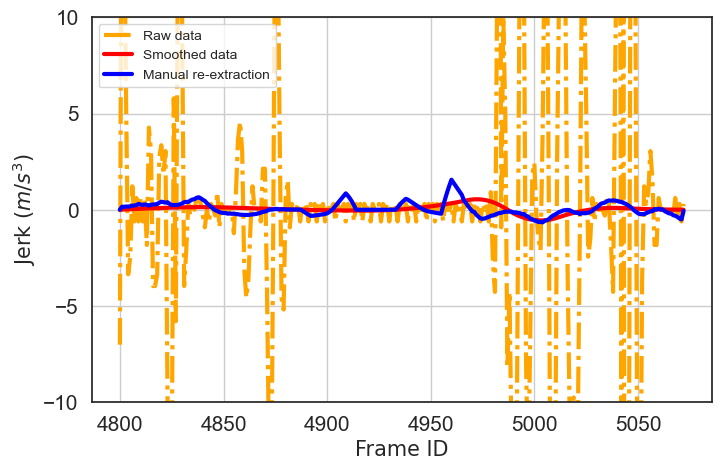

In [37]:
# Smoothed trajectory
font1 = 10; lo = 2; line = 3; line2 = 3; line3 = 3; s1 = 15
font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 15,}
plt.figure(figsize=(8,5));
plt.figure(1)
plt.ylabel("Position (m)",font2); plt.xlabel("Frame ID",font2)
plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
plt.plot(smooth_veh_a[np.where(smooth_veh_a[:,0]==id_num[0])][:,1],smooth_veh_a[np.where(smooth_veh_a[:,0]==id_num[0])][:,3], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3] + smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-7]- smooth_veh_a[np.where(smooth_veh_j[:,0]==id_num[0])][:,-14], color = "r", linewidth= line2, label = "Smoothed data");
plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,5] + sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,9], color = "b", linewidth=line2, label = "Manual re-extraction");
plt.grid(); plt.legend(fontsize=font1); #plt.show() , loc = lo

plt.figure(figsize=(8,5)); 
plt.figure(2); #plt.ylim(13.5,17.5)
plt.ylabel("Speed (m/s)",font2); plt.xlabel("Frame ID",font2)
plt.xticks(fontsize= s1); plt.yticks(fontsize= s1) 
plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-13], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-6], color = "r", linewidth= line2, label = "Smoothed data");
plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,11], color = "b", linewidth=line2, label = "Manual re-extraction");
plt.grid(); plt.legend(fontsize=font1); #plt.show()


plt.figure(figsize=(8,5)); plt.ylim(-6,6)
plt.figure(3); 
plt.ylabel("Acceleration ($m/s^2$)",font2); plt.xlabel("Frame ID",font2) 
plt.xticks(fontsize= s1); plt.yticks(np.arange(-5,5.5,5),fontsize= s1)
plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-12], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-5], color = "r", linewidth= line2, label = "Smoothed data");
plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,12], color = "b", linewidth=line2, label = "Manual re-extraction");
plt.grid(); plt.legend(fontsize=font1); #plt.show()

plt.figure(figsize=(8,5)); plt.ylim(-10,10)
plt.figure(4)
plt.ylabel("Jerk ($m/s^3$)",font2); plt.xlabel("Frame ID",font2)
plt.xticks(fontsize= s1); plt.yticks(np.arange(-10,10.5,5),fontsize= s1)
plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-11], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-4], color = "r", linewidth= line2, label = "Smoothed data");
plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,17], color = "b", linewidth=line2, label = "Manual re-extraction");
plt.grid(); plt.legend(fontsize=font1,loc = lo); #plt.show()


#### Wiedemann plot

[1486.0]


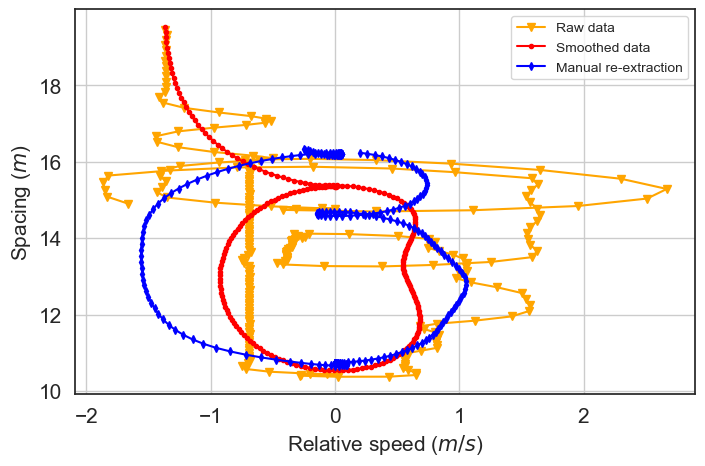

In [38]:
#Wiedemann plot of smoothed trajectory
def wiedemann2(data, full_data, set_id):
    import copy
    update_rho = np.zeros((1,5)) #used to store the updated data
    if set_id == 1: #if it is manuallt re-extracted dataset, change the position to front bumper position
        full_data[:, 2] = full_data[:,2] + full_data[:,3]
        data[:, 2] = data[:,2] + data[:,3]
    for n_id in range(len(id_num)): #go over each vehicle
        sub_veh = full_data[np.where(full_data[:,0] == id_num[n_id] )][1:]
        space_speed = np.zeros((len(sub_veh), 5)); space_speed[:,[0,1,2]] = sub_veh[:,[0,1,4]]
        for i in range(len(sub_veh)):
            if sub_veh[i,4] == 0:
                space_speed[i,3] = 500; space_speed[i,4] = 500
            else:
                leading = full_data[np.where( (full_data[:,0] == sub_veh[i,4]) & (full_data[:,1] == sub_veh[i,1]) )]#leading vehicle
                if len(leading) > 0:
                    space_speed[i,3] = leading[0,2] - sub_veh[i,2]
                    space_speed[i,4] = -leading[0,5] + sub_veh[i,5]
                elif len(leading) == 0:
                    space_speed[i,3] = 500; space_speed[i,4] = 500
        space_speed = space_speed[np.where(space_speed[:,3] != 500)]
        update_rho = np.vstack((update_rho, space_speed)) #combine the individual data
        update_rho = update_rho[1:]
    return pd.DataFrame(update_rho)
wiede_reextract = wiedemann2(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:, [0,1,5,9,14,11]], sample_reextract[:, [0,1,5,9,14,11]], 1)

def relative(data, full_data):
    import copy
    new_array_np = copy.deepcopy(data); update_rho = np.zeros((1,21)) #used to store the updated data
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them
    travel_dis = np.zeros((len(id_set), 2))
    travel_dis[:,0] = id_set; print(id_set)
    for n_id in range(len(id_set)): #go over each vehicle
        sub_veh = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )][1:]
        travel_dis[n_id, 1] = (sub_veh[-7,-1] - sub_veh[-7, 0]) - (sub_veh[14,-1] - sub_veh[14, 0])
        for i in range(len(sub_veh)):
            if sub_veh[i,5] == 0: # no leadning vehicle
                sub_veh[i,-9] = 500; sub_veh[i,-8] = 500
                sub_veh[i,-2] = 500; sub_veh[i,-1] = 500
            else:
                leading = full_data[np.where( (full_data[:,0] == sub_veh[i,5]) & (full_data[:,1] == sub_veh[i,1]) )] #leading vehicle at this time step
                if len(leading) > 0:
                    sub_veh[i,-9] = leading[0,3] - sub_veh[i,3] if sub_veh[0,3] < sub_veh[-1,3] else -leading[0,3] + sub_veh[i,3] # raw spacing
                    sub_veh[i,-2] = (leading[0,3] + leading[0,-7] - leading[0,-14]) - (sub_veh[i,3] + sub_veh[i,-7]-sub_veh[i,-14]) if sub_veh[0,3] < sub_veh[-1,3] else -(leading[0,3] + leading[0,-7] - leading[0,-14]) + (sub_veh[i,3] + sub_veh[i,-7]-sub_veh[i,-14]) #spacing after smoothing
                    sub_veh[i,-8] = - leading[0,-13] + sub_veh[i,-13] #raw relative speed
                    sub_veh[i,-1] = - leading[0,-6] + sub_veh[i,-6] #smoothed relative speed
                elif len(leading) == 0:
                    sub_veh[i,-9] = 500; sub_veh[i,-8] = 500
                    sub_veh[i,-2] = 500; sub_veh[i,-1] = 500
        sub_veh = sub_veh[np.where(sub_veh[:,-1] != 500)]
        update_rho = np.vstack((update_rho, sub_veh)) #combine the individual data
        update_rho = update_rho[1:]
    return pd.DataFrame(update_rho), travel_dis

full_smooth, travel_len = relative(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])], smooth_veh_j)
for n_id in range(len([id_num[0]])):
    plt.figure(figsize=(8,5)); #plt.ylim(0,40)
    plt.tick_params(labelsize=s1)
    plt.figure(n_id+1)
    plt.ylabel("Spacing ($m$)", fontsize=s1); plt.xlabel("Relative speed ($m/s$)", fontsize=s1)
    plt.plot(full_smooth.values[:,-8], full_smooth.values[:,-9], color = "orange", marker = 'v', markersize = 6, label = "Raw data"); #linewidth=1, linestyle='-',
    plt.plot(full_smooth.values[:,-1], full_smooth.values[:,-2], color = "r", marker = 'o', markersize = 3, label = "Smoothed data");
    plt.plot(wiede_reextract.values[:,4], wiede_reextract.values[:,3], color = "b", marker = 'd', markersize = 4, label = "Manual re-extraction");
    plt.grid(); plt.legend(fontsize=font1)

#### Frequency spectrum

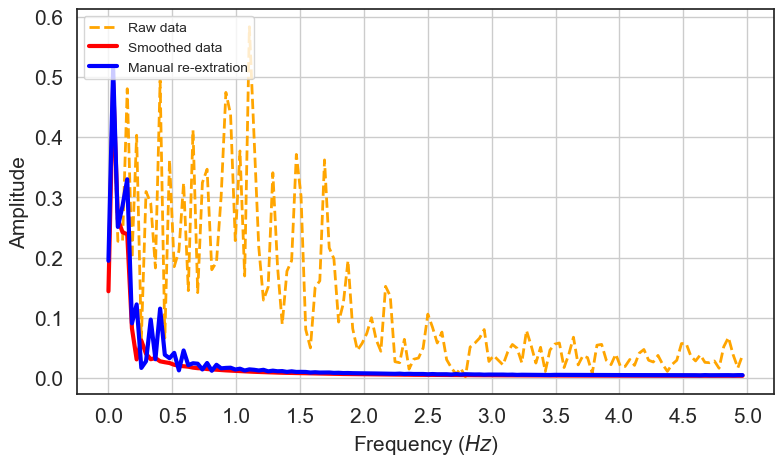

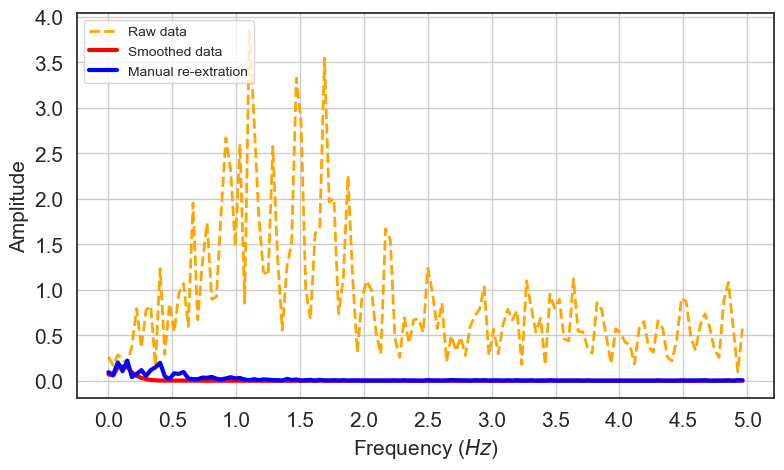

In [39]:
def displaySpectrum_smooth(data_j, data_reextract):
    import copy; from scipy.fftpack import fft
    from scipy import fftpack, arange; import matplotlib.pyplot as plt
    from pylab import plot, show, title, xlabel, ylabel, subplot
    N = len(data_j); duration = N*0.1; dt = 0.1 #duration and sampling step(s)
    fs = 1/dt; #sampling frequency

    hat_a_hz = fft(data_j[:,-12],N); hat_j_hz = fft(data_j[:,-11],N); #raw data
    ja_hz = fft(data_j[:,-5],N); jj_hz = fft(data_j[:,-4],N); #Our method
    reex_a_hz = fft(data_reextract[:,-6],N); reex_j_hz = fft(data_reextract[:,-1],N)
    frq = np.linspace(0, fs, N)
    raw_a = 2*(np.absolute(hat_a_hz))/N; raw_j = 2*(np.absolute(hat_j_hz))/N;  
    mag_ja = 2*(np.absolute(ja_hz))/N; mag_jj = 2*(np.absolute(jj_hz))/N;
    mag_reex_a = 2*(np.absolute(reex_a_hz))/N; mag_reex_j = 2*(np.absolute(reex_j_hz))/N
    
    s1 = 15; font2 = {'weight' : 'normal', 'size' : 15,}; 
    plt.figure(figsize=(9,5)); plt.xticks(np.arange(0, 5.5, 0.5)) #plt.xlim(0,100)
    plt.figure(1)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_a[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    plt.plot(frq[:len(frq) // 2], mag_ja[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    plt.plot(frq[:len(frq) // 2],mag_reex_a[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    plt.grid(True); plt.legend(fontsize=10, loc = 2); #plt.show()

    plt.figure(figsize=(9,5)); plt.xticks(np.arange(0, 5.5, 0.5)); #plt.ylim(-0.01,1); 
    plt.figure(2)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_j[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    plt.plot(frq[:len(frq) // 2], mag_jj[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    plt.plot(frq[:len(frq) // 2],mag_reex_j[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    plt.grid(True); plt.legend(fontsize=10, loc = 2); #plt.show()
  
displaySpectrum_smooth(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])], sample_reextract[np.where(sample_reextract[:,0] == id_num[0])])

## Comparison with an existing method and validation with manual re-extraction
    
We still adopt the manually re-extracted data from \citep{coifman2017critical} as the ground truth data (referred to as 'manual re-extraction' hereafter).
The trajectories smoothed by the multistep optimization method in \citep{montanino2015trajectory} have also been released, which provide a great source of comparative data. We adopt them (referred to as 'multistep optimization' hereafter) for comparing with the trajectories smoothed by our method. 
Thus we have five sources of data for comparison: (1) raw data, (2) multistep optimization, (3) our method, and (4) manual re-extraction.

In [40]:
'''The result of this module corresponds to Table 4 in the paper'''
def statistic(mo_x, x1, x2): #l2_x is multistep optimization data, x1 is denoise (among which x1[:,-14:-7] are the raw data), x2 is ground truth
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import copy
    true_data = copy.deepcopy(x2)
    true_data[:,5] = true_data[:,5] + true_data[:,9]
    derivatives = ["position     ", "speed        ","acceleration ","jerk         "]
    ground_truth_id = [5, -7, -6, -1] #  column number of position, speed, acceleration, jerk in the ground truth data
    multistep_id = [3, 4, 5, -1] #  column number of position, speed, acceleration, jerk in the multistep optimization data
    up = [200, 30, 4, 8] #upper bounds of derivatives of positions
    low = [-200, 0, -5, -8] #lower bounds of derivatives of positions
    for i in range(4):
        true_value = true_data[:,ground_truth_id[i] ] - x1[:,3] if i == 0 else true_data[:,ground_truth_id[i] ]
        print("++++++++++++++++Raw data++++++++++++++++")
        raw = x1[:,-14+i] - x1[:,-14] if i == 0 else x1[:,-14+i] #data smoothed by multistep optimization method
        mse_test0 = mean_squared_error(raw, true_value) #mean squared error between the multistep optimiztaion smoothed data and ground truth
        mean_x0 = round(np.mean(raw),2); max_x0 = round(np.max(raw),1); min_x0 = round(np.min(raw),1); std_x0 = round(np.std(raw),2)
        outlier0 = round(100*len(raw[np.where((np.round(raw[:],5) > up[i]) | (np.round(raw[:],5) < low[i]))])/len(raw),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x0, "Std: ", std_x0, "Range: [", min_x0, max_x0, "]  Outlier: ", outlier0, "mse: ", round(mse_test0,2) ); 
        print("+++++++++Multistep optimiztaion+++++++++")
        multistep_smooth = mo_x[:,multistep_id[i]] - x1[:,3] if i == 0 else mo_x[:,multistep_id[i]] #data smoothed by multistep optimization method
        mse_test1 = mean_squared_error(multistep_smooth, true_value) #mean squared error between the multistep optimiztaion smoothed data and ground truth
        mean_x1 = round(np.mean(multistep_smooth),2); max_x1 = round(np.max(multistep_smooth),1); min_x1 = round(np.min(multistep_smooth),1); std_x1 = round(np.std(multistep_smooth),2)
        outlier1 = round(100*len(multistep_smooth[np.where((np.round(multistep_smooth[:],5) > up[i]) | (np.round(multistep_smooth[:],5) < low[i]))])/len(multistep_smooth),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x1, "Std: ", std_x1, "Range: [", min_x1, max_x1, "]  Outlier: ", outlier1, "mse: ", round(mse_test1,2) ); 
        print("+++++++++++++Our method+++++++++++++++++")
        smoothed = x1[:,-7] - x1[:,-14] if i == 0 else x1[:,-7+i] #data smoothed by our method
        mse_test2 = mean_squared_error(smoothed, true_value) #mean squared error between our smoothed data and ground truth
        mean_x2 = round(np.mean(smoothed),2); max_x2 = round(np.max(smoothed),1); min_x2 = round(np.min(smoothed),1); std_x2 = round(np.std(smoothed),2)
        outlier2 = round(100*len(smoothed[np.where((np.round(smoothed[:],5) > up[i]) | (np.round(smoothed[:],5) < low[i]))])/len(smoothed),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x2, "Std: ", std_x2, "Range: [", min_x2, max_x2, "]  Outlier: ", outlier2, "mse: ", round(mse_test2,2) ); 
        print("+++++++++Manual re-extraction+++++++++++")
        rextracted = true_data[:, ground_truth_id[i]] - x1[:,3] if i == 0 else true_data[:, ground_truth_id[i]] #data smoothed by our method
        mse_test3 = mean_squared_error(rextracted, true_value) # always zero
        mean_x3 = round(np.mean(rextracted),2); max_x3 = round(np.max(rextracted),1); min_x3 = round(np.min(rextracted),1); std_x3 = round(np.std(rextracted),2)
        outlier3 = round(100*len(rextracted[np.where((np.round(rextracted[:],5) > up[i]) | (np.round(rextracted[:],5) < low[i]))])/len(rextracted),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x3, "Std: ", std_x3, "Range: [", min_x3, max_x3, "]  Outlier: ", outlier3, "mse: ", round(mse_test3,2) ); 
    
statistic(veh_multistep_pd.values, smooth_veh_j, veh_reextract_pd.values) 

++++++++++++++++Raw data++++++++++++++++
derivative:  position      Mean:  0.0 Std:  0.0 Range: [ 0.0 0.0 ]  Outlier:  0.0 mse:  1.91
+++++++++Multistep optimiztaion+++++++++
derivative:  position      Mean:  -0.04 Std:  0.88 Range: [ -56.6 9.9 ]  Outlier:  0.0 mse:  2.18
+++++++++++++Our method+++++++++++++++++
derivative:  position      Mean:  -0.0 Std:  0.38 Range: [ -1.6 2.4 ]  Outlier:  0.0 mse:  1.87
+++++++++Manual re-extraction+++++++++++
derivative:  position      Mean:  0.12 Std:  1.38 Range: [ -11.9 10.5 ]  Outlier:  0.0 mse:  0.0
++++++++++++++++Raw data++++++++++++++++
derivative:  speed         Mean:  8.07 Std:  4.07 Range: [ 0.0 36.0 ]  Outlier:  0.0 mse:  0.88
+++++++++Multistep optimiztaion+++++++++
derivative:  speed         Mean:  8.05 Std:  4.01 Range: [ 0.0 27.0 ]  Outlier:  0.0 mse:  0.47
+++++++++++++Our method+++++++++++++++++
derivative:  speed         Mean:  8.04 Std:  3.99 Range: [ 0.0 27.2 ]  Outlier:  0.0 mse:  0.32
+++++++++Manual re-extraction+++++++++++


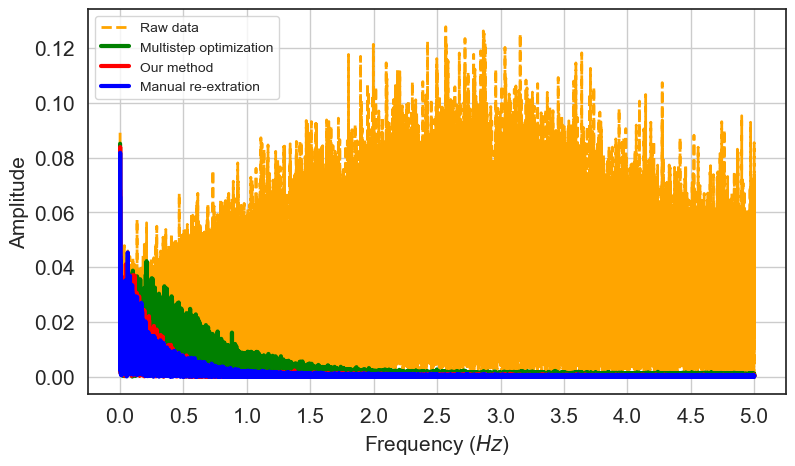

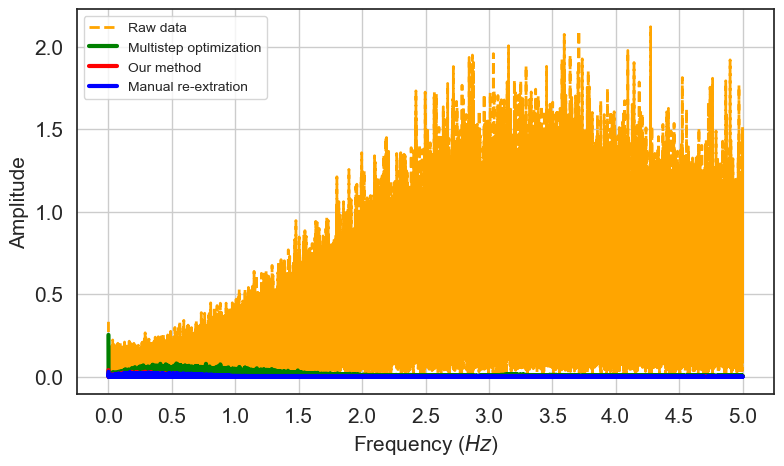

In [41]:
def displaySpectrum_smooth(data_qp, data_mo, data_reex):
    import copy; from scipy.fftpack import fft
    import seaborn as sns
    from scipy import fftpack, arange; import matplotlib.pyplot as plt
    from pylab import plot, show, title, xlabel, ylabel, subplot
    
    N = len(data_qp); duration = N*0.1; dt = 0.1 #duration and sampling step(s)
    fs = 1/dt; #sampling frequency
    series_raw = copy.deepcopy(data_qp);  
    hat_a_hz = fft(series_raw[:,9],N); hat_j_hz = fft(series_raw[:,10],N); #raw data
    moa_hz = fft(data_mo[:,5],N); moj_hz = fft(data_mo[:,9],N) #Multistep optimization
    qpa_hz = fft(data_qp[:,-5],N); qpj_hz = fft(data_qp[:,-4],N); #Our method
    reex_a_hz = fft(data_reex[:,-6],N); reex_j_hz = fft(data_reex[:,-1],N)
    
    frq = np.linspace(0, fs, N)
    raw_a = 2*(np.absolute(hat_a_hz))/N; raw_j = 2*(np.absolute(hat_j_hz))/N; #raw data
    mag_moa = 2*(np.absolute(moa_hz))/N; mag_moj = 2*(np.absolute(moj_hz))/N; #Multistep optimization
    mag_qpa = 2*(np.absolute(qpa_hz))/N; mag_qpj = 2*(np.absolute(qpj_hz))/N; #Our method
    mag_reex_a = 2*(np.absolute(reex_a_hz))/N; mag_reex_j = 2*(np.absolute(reex_j_hz))/N
    
    s1 = 15; font2 = {'weight' : 'normal', 'size' : s1,}; 
    sns.set(rc={"figure.figsize": (9,5)}, style="white", palette=None)
    
    plt.figure(figsize=(9,5)); plt.xticks(np.arange(0, 5.5, 0.5)) #plt.xlim(0,100)
    plt.figure(1)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_a[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    plt.plot(frq[:len(frq) // 2],mag_moa[:len(frq) // 2], color = "g", linewidth=3, label = "Multistep optimization");
    plt.plot(frq[:len(frq) // 2], mag_qpa[:len(frq) // 2], color = "r", linewidth=3, label = "Our method"); 
    plt.plot(frq[:len(frq) // 2],mag_reex_a[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    plt.grid(True); plt.legend(fontsize=10, loc = 2); #plt.show()
    
    plt.figure(figsize=(9,5)); plt.xticks(np.arange(0, 5.5, 0.5)); #plt.ylim(-0.01,0.6); 
    plt.figure(2)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_j[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    plt.plot(frq[:len(frq) // 2],mag_moj[:len(frq) // 2], color = "g", linewidth=3, label = "Multistep optimization");
    plt.plot(frq[:len(frq) // 2], mag_qpj[:len(frq) // 2], color = "r", linewidth=3, label = "Our method"); 
    plt.plot(frq[:len(frq) // 2],mag_reex_j[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    plt.grid(True); plt.legend(fontsize=10, loc = 2); #plt.show()
    
displaySpectrum_smooth(smooth_veh_j, veh_multistep_pd.values, veh_reextract_pd.values)

In [44]:
#recalculate the positions
smooth_traj1 = copy.deepcopy(smooth_veh_j)
smooth_traj1[:,3] = smooth_traj1[:,3] + smooth_traj1[:, -7] - smooth_traj1[:,-14]

In [45]:
processed_data = pd.DataFrame(smooth_traj1[:, [0,1,2,3,4,5,6,-6,-5,-4]])
processed_data.columns =  ['Vehicle_ID','Frame_ID','Global_Time','Local_Y','v_Length', 'Preceding','Following', "speed","acceleration","jerk"]
processed_data

,Vehicle_ID,Frame_ID,Global_Time,Local_Y,v_Length,Preceding,Following,speed,acceleration,jerk
0,1.000,746.000,5.000,384.896,4.359,0.000,11.000,6.262,0.350,0.129
1,1.000,747.000,5.100,385.526,4.359,0.000,11.000,6.297,0.361,0.107
2,1.000,748.000,5.200,386.159,4.359,0.000,11.000,6.333,0.370,0.087
3,1.000,749.000,5.300,386.796,4.359,0.000,11.000,6.370,0.376,0.067
4,1.000,750.000,5.400,387.437,4.359,0.000,11.000,6.407,0.381,0.048
...,...,...,...,...,...,...,...,...,...,...
143612,1283.000,4131.000,12.800,444.982,4.206,0.000,1293.000,10.710,1.599,0.082
143613,1283.000,4132.000,12.900,446.069,4.206,0.000,1293.000,10.870,1.605,0.059
143614,1283.000,4133.000,13.000,447.172,4.206,0.000,1293.000,11.030,1.609,0.039
143615,1283.000,4134.000,13.100,448.291,4.206,0.000,1293.000,11.191,1.611,0.023


In [46]:
processed_data.to_csv('smoothed_i80_camera6.csv') 

## Application to highD dataset

We also apply our method to highD \citep{krajewski2018highd} datasets, a newly-released vehicle trajectory dataset collected by drone-equipped high-resolution cameras at a segment of more than 400 meters with an average estimated accuracy of 0.1 meters. 
There is no speed limit at the study site, so we choose $[0,50]\ m/s$, a typical constraint of vehicle mechanics, as the speed bounds. We adopt the same acceleration and jerk ranges as before.
There are 60 subsets in total, and we use the 25th subset as an example. 
The smoothed dataset is publicly accessible. We also share our codes, with which all the subsets can be smoothed.

This script can be adjusted to smooth highD data, or the script for smoothing highD data can be accessed at [smooth_highD](https://github.com/ximeng96/Quadratic-programming-method-for-vehicle-trajectory-correcting-and-smoothing-from-noisy-data/blob/main/codes/QP_smoothing_highd.ipynb)